
Python was not able to load the fast fortran material routines.


*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/2_partitions_2quad_mesh.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/2_partitions_2quad_mesh.msh successfully imported. 
Assign a material to a physical group.
*************************************************************


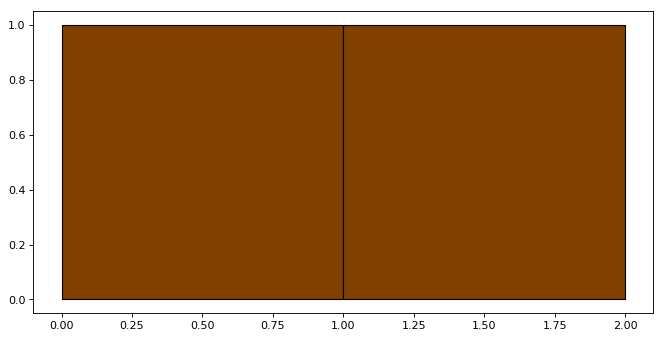

In [1]:
# importing lib and setting a list of meshes to be tested
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
import pandas as pd

msh_dict = {}
msh_dict[0] = amfe.amfe_dir('meshes/test_meshes/Geom3.msh')
msh_dict[1] = amfe.amfe_dir('meshes/test_meshes/simple_2.msh')
msh_dict[2] = mshfile = amfe.amfe_dir('meshes/test_meshes/3_partition_pressure_corner.msh')
msh_dict[3] = mshfile = amfe.amfe_dir('meshes/test_meshes/geo_hole_quad_part_4.msh')
msh_dict[4] = mshfile = amfe.amfe_dir('meshes/test_meshes/2_partitions_quad_mesh.msh')
msh_dict[5] = mshfile = amfe.amfe_dir('meshes/test_meshes/2_partitions_2quad_mesh.msh')
msh_dict[6] = mshfile = amfe.amfe_dir('meshes/test_meshes/4_partitions_quad_mesh.msh')
msh_dict[7] = mshfile = amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')
msh_dict[8] = mshfile = amfe.amfe_dir('meshes/test_meshes/1_quad_elem.msh')


domain_id = {}
domain_id[0] = 3
domain_id[1] = 3
domain_id[2] = 11
domain_id[3] = 8
domain_id[4] = 3
domain_id[5] = 3
domain_id[6] = 3
domain_id[7] = 3
domain_id[8] = 6


# select mesh to be plotted
mesh_id1 = 5
mshfile = msh_dict[mesh_id1]

m1 = amfe.Mesh()
m1.import_msh(mshfile)

domain = m1.set_domain('phys_group', domain_id[mesh_id1])

fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_submesh(domain,ax1)
plt.show()


*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/1_quad_elem.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/1_quad_elem.msh successfully imported. 
Assign a material to a physical group.
*************************************************************


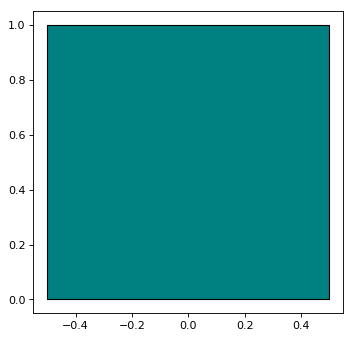

In [2]:


# select mesh to be plotted
mesh_id2 = 8
mshfile = msh_dict[mesh_id2]

m2 = amfe.Mesh()
m2.import_msh(mshfile)

domain = m2.set_domain('phys_group', domain_id[mesh_id2])
submesh3 = domain

fig, ax1=plt.subplots(1,figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_submesh(domain,ax1)
plt.show()

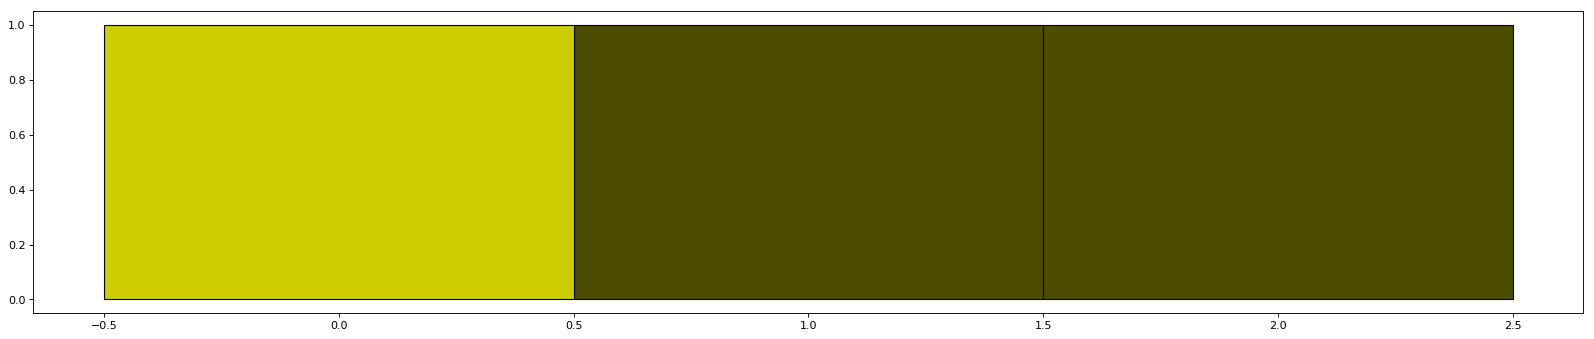

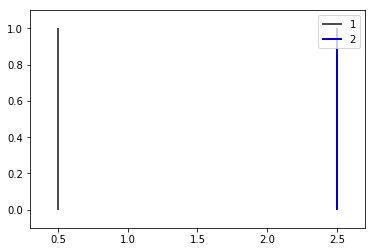

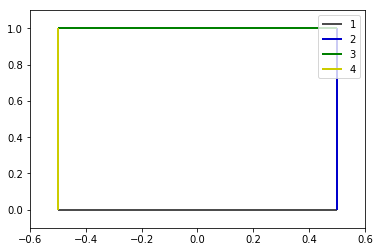

In [3]:
# applying tranlation to mesh

sys.path.append(r"H:\TUM-PC\Dokumente\Projects\FETI")
from cyclic_domain_test import *

key  = 1
x_offset = 0.5
y_offset = 0.0
z_offset = 0.0
vector_offset = [x_offset,y_offset,z_offset]
new = translation(m1.nodes,vector_offset)


# creating submesh 1
submesh1 = copy.deepcopy(m1.groups[domain_id[mesh_id1]])
submesh1.parent_mesh.nodes = new
submesh1 = m1.groups[domain_id[mesh_id1]]
submesh1.parent_mesh.nodes = new

# creating submesh 2
submesh2 = copy.deepcopy(submesh1)
new = rot_z(submesh2.parent_mesh.nodes,180,ref_point_vector=[0,0.5,0])
submesh2.parent_mesh.nodes = new

fig, ax1=plt.subplots(1,figsize=(25, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_submesh(submesh1,ax1)
amfe.plot_submesh(submesh3,ax1)



amfe.plot_boundary_1d(submesh1.parent_mesh)
amfe.plot_boundary_1d(submesh3.parent_mesh)
plt.show()


In [4]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

# append domains to MechanicalAssembly
my_system = amfe.MechanicalAssembly()
my_system.append_domain(submesh1, my_material,1)
my_system.append_domain(submesh2, my_material, 2)
my_system.append_domain(submesh3, my_material, 3)


my_system.update_global_system()

In [5]:
my_system.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,4,1,2,1,1,None,1,0,5,NaN,NaN
1,2,2,straight_line,4,2,2,1,1,None,1,2,3,NaN,NaN
2,3,3,Quad4,5,3,1,2,1,[-2],1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0
4,5,1,straight_line,4,1,2,1,3,None,2,6,11,NaN,NaN
5,6,2,straight_line,4,2,2,1,3,None,2,8,9,NaN,NaN
6,7,3,Quad4,5,3,1,2,3,[-4],2,6,7,10.0,11.0
7,8,4,Quad4,5,3,1,2,4,[-3],2,7,8,9.0,10.0
8,9,1,straight_line,2,1,1,1,5,None,3,15,14,NaN,NaN
9,10,2,straight_line,2,2,2,1,5,None,3,14,13,NaN,NaN


In [6]:
# selectiong submeshes for boundary condition

# select submesh for Neumann B.C
sub_neu1 = my_system.get_submesh(1,2)
sub_neu2 = my_system.get_submesh(2,2)


# select submesh for Dirichlet
sub_dir1 = my_system.get_submesh(3,1)

# select submesh for interfaces
sub_int1 = my_system.get_submesh(1,1)
sub_int2 = my_system.get_submesh(3,2)

sub_int3 = my_system.get_submesh(2,1)
sub_int4 = my_system.get_submesh(3,4)



# appling bc
value = 10e8
my_system.apply_neumann_boundaries(sub_neu1,value)
my_system.apply_neumann_boundaries(sub_neu2,value)
my_system.apply_dirichlet_boundaries(sub_dir1,0.0,'xy')

my_system.add_bonded_interface_constraint(sub_int1,sub_int2)
my_system.add_bonded_interface_constraint(sub_int3,sub_int4)
my_system.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,4,1,2,1,1,None,1,0,5,NaN,NaN
1,2,2,straight_line,4,2,2,1,1,None,1,2,3,NaN,NaN
2,3,3,Quad4,5,3,1,2,1,"[-2, -5]",1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0
4,5,1,straight_line,4,1,2,1,3,None,2,6,11,NaN,NaN
5,6,2,straight_line,4,2,2,1,3,None,2,8,9,NaN,NaN
6,7,3,Quad4,5,3,1,2,3,"[-4, -5]",2,6,7,10.0,11.0
7,8,4,Quad4,5,3,1,2,4,[-3],2,7,8,9.0,10.0
8,9,1,straight_line,2,1,1,1,5,None,3,11,0,NaN,NaN
9,10,2,straight_line,2,2,2,1,5,None,3,0,5,NaN,NaN


Extract interface node from sub_1 and sub_2
Extract interface node from sub_1 and sub_5
Interface nodes from sub_2 and sub_1 already extracted
Extract interface node from sub_3 and sub_4
Extract interface node from sub_3 and sub_5
Interface nodes from sub_4 and sub_3 already extracted
Interface nodes from sub_5 and sub_1 already extracted
Interface nodes from sub_5 and sub_3 already extracted
Extract interface node from sub_1 and sub_2
Extract interface node from sub_1 and sub_5
Interface nodes from sub_2 and sub_1 already extracted
Extract interface node from sub_3 and sub_4
Extract interface node from sub_3 and sub_5
Interface nodes from sub_4 and sub_3 already extracted
Interface nodes from sub_5 and sub_1 already extracted
Interface nodes from sub_5 and sub_3 already extracted
Extract interface node from sub_1 and sub_2
Extract interface node from sub_1 and sub_5
Interface nodes from sub_2 and sub_1 already extracted
Extract interface node from sub_3 and sub_4
Extract interface nod

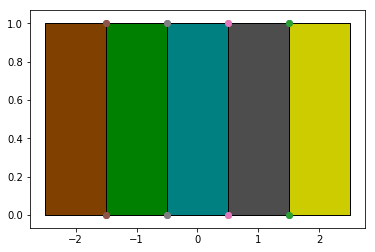

In [7]:
domain = my_system.update_domain()
my_system.split_in_partitions()
domain = my_system
my_system.groups

amfe.plot_domain(my_system)
plt.show()

In [8]:
super_domain = amfe.SuperDomain(domain.groups)
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()

BTGT = B.T.dot(G.T)
GB = G.dot(B)

n_dof = super_domain.total_displacement_dofs
n_int = super_domain.total_lambda_dofs
n_null = super_domain.total_alpha_dofs

block_zero_1 = np.zeros([n_null,n_int+n_null])
block_zero_2 = np.zeros([n_int,n_int+n_null])

zero_vector = np.zeros(n_int+n_null)

A1 = np.hstack((Kd,BTGT,B.T))
A2 = np.hstack((GB,block_zero_1))
A3 = np.hstack((B,block_zero_2))


A = np.vstack((A1,A2,A3))
b = np.concatenate((fd,zero_vector))

Ainv = np.linalg.pinv(A)
x = Ainv.dot(b)
#x = np.linalg.solve(A,b)

x = np.linalg.solve(A,b)
u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]


u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]


print('u = ', u_dual)
print('lambda = ', lambda_dual)
print('alpha = ', alpha_dual)

u = super_domain.eval_subdomain_displacement(lambda_dual,alpha_dual)

print(u)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,scale=(0,10,0.1))  

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
u =  [ 0.          0.          0.04727292 -0.03060078  0.07953186 -0.04539089
  0.03225894 -0.01147378  0.04727292 -0.03060078  0.09494203 -0.06319723
  0.12720098 -0.07731233  0.07953186 -0.04539089 -0.03225894 -0.01147378
 -0.07953186 -0.04539089 -0.04727292 -0.03060078  0.         

A Jupyter Widget

<function __main__.plot_static>

In [9]:
u

{1: array([  0.00000000e+00,   0.00000000e+00,  -5.54456903e-01,
         -1.33397202e+09,   1.33397202e+09,  -1.33397202e+09,
          1.33397202e+09,  -1.57392572e-01]),
 2: array([ -3.17417926e+09,  -1.90030599e+09,  -3.17417926e+09,
         -2.37913393e+09,  -2.69535132e+09,  -2.37913393e+09,
         -2.69535132e+09,  -1.90030599e+09]),
 3: array([  6.63389437e+08,  -5.10391369e-02,   6.63389437e+08,
          6.63389437e+08,  -8.17231995e-02,   6.63389437e+08,
          0.00000000e+00,   0.00000000e+00]),
 4: array([  2.32212266e+08,  -4.22360432e+08,   2.32212266e+08,
          2.52469868e+08,  -4.42618034e+08,   2.52469868e+08,
         -4.42618034e+08,  -4.22360432e+08]),
 5: array([ 0.        ,  0.        ,  0.49325643, -0.21022228,  0.38600534,
         0.17445475,  0.        ,  0.        ])}

In [10]:
u_dual

array([ 0.        ,  0.        ,  0.04727292, -0.03060078,  0.07953186,
       -0.04539089,  0.03225894, -0.01147378,  0.04727292, -0.03060078,
        0.09494203, -0.06319723,  0.12720098, -0.07731233,  0.07953186,
       -0.04539089, -0.03225894, -0.01147378, -0.07953186, -0.04539089,
       -0.04727292, -0.03060078,  0.        ,  0.        , -0.07953186,
       -0.04539089, -0.12720098, -0.07731233, -0.09494203, -0.06319723,
       -0.04727292, -0.03060078,  0.        ,  0.        ,  0.03225894,
       -0.01147378, -0.03225894, -0.01147378,  0.        ,  0.        ])

In [11]:
u 

{1: array([  0.00000000e+00,   0.00000000e+00,  -5.54456903e-01,
         -1.33397202e+09,   1.33397202e+09,  -1.33397202e+09,
          1.33397202e+09,  -1.57392572e-01]),
 2: array([ -3.17417926e+09,  -1.90030599e+09,  -3.17417926e+09,
         -2.37913393e+09,  -2.69535132e+09,  -2.37913393e+09,
         -2.69535132e+09,  -1.90030599e+09]),
 3: array([  6.63389437e+08,  -5.10391369e-02,   6.63389437e+08,
          6.63389437e+08,  -8.17231995e-02,   6.63389437e+08,
          0.00000000e+00,   0.00000000e+00]),
 4: array([  2.32212266e+08,  -4.22360432e+08,   2.32212266e+08,
          2.52469868e+08,  -4.42618034e+08,   2.52469868e+08,
         -4.42618034e+08,  -4.22360432e+08]),
 5: array([ 0.        ,  0.        ,  0.49325643, -0.21022228,  0.38600534,
         0.17445475,  0.        ,  0.        ])}

In [12]:
pd.DataFrame(B)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
B.dot(u_dual)

array([  1.11022302e-16,   2.11636264e-16,  -1.38777878e-16,
         1.87350135e-16,   0.00000000e+00,   0.00000000e+00,
        -6.93889390e-17,   5.20417043e-18,  -1.38777878e-17,
        -3.46944695e-18,  -4.16333634e-17,   4.16333634e-17,
         0.00000000e+00,   0.00000000e+00,  -6.93889390e-17,
         7.45931095e-17])

In [14]:
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()
F, d = super_domain.assemble_F_and_d()

n_null = len(e) # null space size
n_int = len(d) # interface size
Zeros = np.zeros([n_null ,n_null])

A1 = np.hstack((F,G.T))
A2 = np.hstack((G,Zeros))

A = np.vstack((A1,A2))
b = np.concatenate((d,e))

# Dual interface problem
x = np.linalg.solve(A,b)
global_lambda = x[:n_int]
alpha = x[n_int:]

global_alpha = alpha

u = super_domain.eval_subdomain_displacement(global_lambda,alpha)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,mode=(0,10,1),scale=(0,10,1)) 

A Jupyter Widget

<function __main__.plot_static>

In [15]:
pd.DataFrame(super_domain.K_list[1])

,0,1,2,3,4,5,6,7
0,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08,-5.192308e+09,-3.750000e+09,1.153846e+09,2.884615e+08
1,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09,-3.750000e+09,-5.192308e+09,-2.884615e+08,-6.346154e+09
2,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09,1.153846e+09,-2.884615e+08,-5.192308e+09,3.750000e+09
3,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10,2.884615e+08,-6.346154e+09,3.750000e+09,-5.192308e+09
4,-5.192308e+09,-3.750000e+09,1.153846e+09,2.884615e+08,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08
5,-3.750000e+09,-5.192308e+09,-2.884615e+08,-6.346154e+09,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09
6,1.153846e+09,-2.884615e+08,-5.192308e+09,3.750000e+09,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09
7,2.884615e+08,-6.346154e+09,3.750000e+09,-5.192308e+09,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10


In [16]:
pd.DataFrame(super_domain.fext_list[1])

,0
0,0.0
1,0.0
2,500000000.0
3,0.0
4,500000000.0
5,0.0
6,0.0
7,0.0


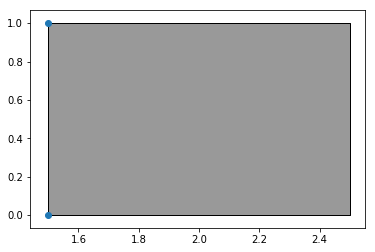

In [17]:
amfe.plot_submesh(my_system.groups[2])
plt.show()

In [18]:
B.dot(u_dual).dot(B.dot(u_dual))

1.3036740164178724e-31